In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as ticker # Import ticker module

## Importing first dataaset
deliveries = pd.read_csv("deliveries.csv")

## Importing second dataset
matches = pd.read_csv("matches.csv")

In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches.shape

(1095, 20)

In [6]:
deliveries.shape

(260920, 17)

In [10]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

## Data Cleaning

## We will replace Rising Pune Supergiants to Rising Pune Supergiant in team1, team2, toss, winner column in Matches dataset, Similarly we will also replace Royal Challengers Bengaluru to Royal Challengers Bangalore

In [4]:
matches['team1'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)
matches['team2'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)
matches['toss_winner'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)
matches['winner'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)

matches['team1'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)
matches['team2'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)
matches['winner'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)

matches['team1'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)
matches['team2'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)
matches['toss_winner'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)
matches['winner'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)

matches['team1'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)
matches['team2'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)
matches['toss_winner'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)
matches['winner'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)


In [8]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    144
Chennai Super Kings            128
Delhi Capitals                 126
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Deccan Chargers                 39
Gujarat Titans                  37
Punjab Kings                    31
Pune Warriors                   23
Lucknow Super Giants            23
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [9]:
### Changing Team Names in deliveries dataset

In [12]:
deliveries['batting_team'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)
deliveries['bowling_team'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace= True)

deliveries['batting_team'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)
deliveries['bowling_team'].replace({'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore'}, inplace= True)

deliveries['batting_team'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)
deliveries['bowling_team'].replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace= True)

deliveries['batting_team'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)
deliveries['bowling_team'].replace({'Gujarat Lions' : 'Gujarat Titans'}, inplace= True)

In [14]:
deliveries['batting_team'].value_counts()
# deliveries['bowling_team'].value_counts()

batting_team
Mumbai Indians                 31437
Royal Challengers Bangalore    30023
Delhi Capitals                 29732
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Gujarat Titans                  9060
Deccan Chargers                 9034
Punjab Kings                    6833
Pune Warriors                   5443
Lucknow Super Giants            5400
Rising Pune Supergiant          3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64

In [18]:
## Check how many Null values are present in city column in Matches dataset, then fill NaN, None with Unknown

print(matches['city'].isna().sum())

matches['city'].fillna('Unknown', inplace=True)


## Similarly, replacing Null or NaN values in method to No D/L (No Duckworths Lewis method used)
matches['method'].fillna('No D/L', inplace = True)

0


In [19]:
matches['method'].value_counts()

method
No D/L    1074
D/L         21
Name: count, dtype: int64

## Evaluate Success Rate of Each Team

In [21]:
matches.groupby('winner').count()['id']  ## Finding Total Wins for each Team

winner
Chennai Super Kings            138
Deccan Chargers                 29
Delhi Capitals                 115
Gujarat Titans                  41
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders          131
Lucknow Super Giants            24
Mumbai Indians                 144
Pune Warriors                   12
Punjab Kings                    24
Rajasthan Royals               112
Rising Pune Supergiant          15
Royal Challengers Bangalore    123
Sunrisers Hyderabad             88
Name: id, dtype: int64

In [25]:
## Finding Total Games played by each Team : 
matches.groupby('team1').count()['id'] + matches.groupby('team2').count()['id']

team1
Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                 252
Gujarat Titans                  75
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          30
Royal Challengers Bangalore    255
Sunrisers Hyderabad            182
Name: id, dtype: int64

In [28]:
## Finding the Success Ratio = Divide total count of wins / total games played by that team

success_ratio = matches.groupby('winner').count()['id'] / (matches.groupby('team1').count()['id'] + matches.groupby('team2').count()['id'])
print(success_ratio)

winner
Chennai Super Kings            0.579832
Deccan Chargers                0.386667
Delhi Capitals                 0.456349
Gujarat Titans                 0.546667
Kings XI Punjab                0.463158
Kochi Tuskers Kerala           0.428571
Kolkata Knight Riders          0.521912
Lucknow Super Giants           0.545455
Mumbai Indians                 0.551724
Pune Warriors                  0.260870
Punjab Kings                   0.428571
Rajasthan Royals               0.506787
Rising Pune Supergiant         0.500000
Royal Challengers Bangalore    0.482353
Sunrisers Hyderabad            0.483516
Name: id, dtype: float64


In [29]:
## Arranging the ratio in descending order

success_ratio_desc = success_ratio.sort_values(ascending = False)
print(success_ratio_desc)

winner
Chennai Super Kings            0.579832
Mumbai Indians                 0.551724
Gujarat Titans                 0.546667
Lucknow Super Giants           0.545455
Kolkata Knight Riders          0.521912
Rajasthan Royals               0.506787
Rising Pune Supergiant         0.500000
Sunrisers Hyderabad            0.483516
Royal Challengers Bangalore    0.482353
Kings XI Punjab                0.463158
Delhi Capitals                 0.456349
Kochi Tuskers Kerala           0.428571
Punjab Kings                   0.428571
Deccan Chargers                0.386667
Pune Warriors                  0.260870
Name: id, dtype: float64


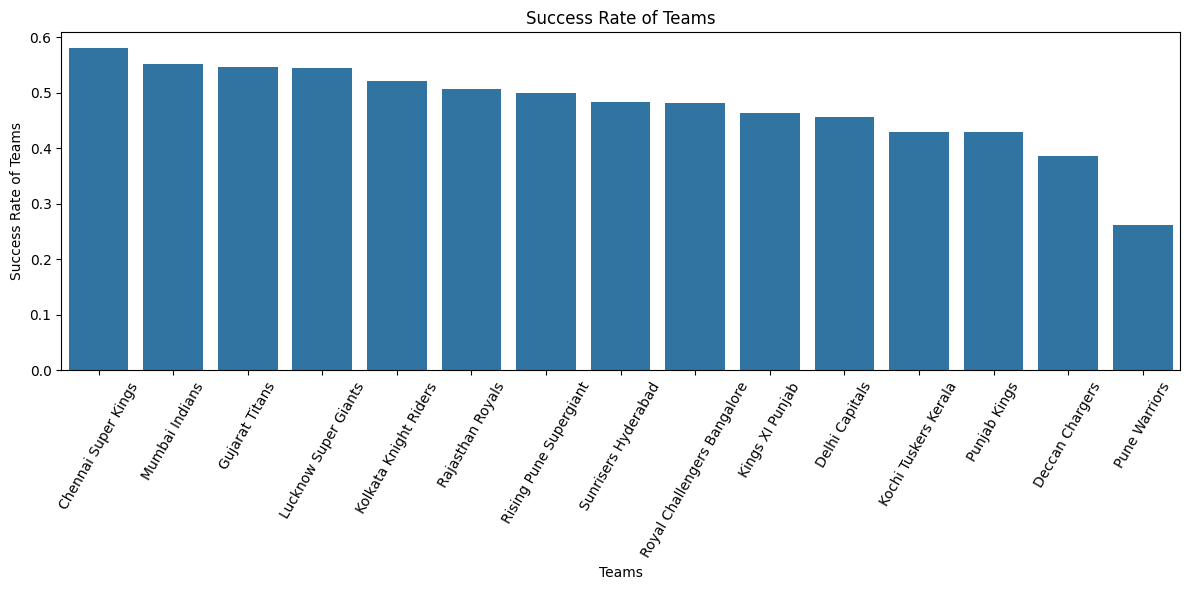

In [34]:
## Plotting the Graph

plt.figure(figsize = [12,6])
sns.barplot(x = success_ratio_desc.index , y = success_ratio_desc.values)

plt.title('Success Rate of Teams')
plt.xlabel('Teams')
plt.ylabel('Success Rate of Teams')

plt.xticks(rotation = 60) ## Rotating the label of teams by 60 degree
plt.tight_layout()
plt.show()


## Team Which Won Most Titles

In [38]:
winner_count = matches.groupby('season')[['season', 'winner']].tail(1)['winner'].value_counts()   ## Har season ka jo last match h uska jo winner h vo team return kr do

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

In [ ]:
## Plotting the Graph

plt.figure(figsize = [12,6])
sns.barplot(x = winner_count.index , y = winner_count.values)

plt.title('IPL Winners')
plt.xlabel('Teams')
plt.ylabel('Total No. of Trophies')

plt.xticks(rotation = 60) ## Rotating the label of teams by 60 degree
plt.tight_layout()
plt.show()

## Top 10 Players with Most Runs

             batter  Runs
631         V Kohli  8014
512        S Dhawan  6769
477       RG Sharma  6630
147       DA Warner  6567
546        SK Raina  5536
374        MS Dhoni  5243
30   AB de Villiers  5181
124        CH Gayle  4997
501      RV Uthappa  4954
282      KD Karthik  4843


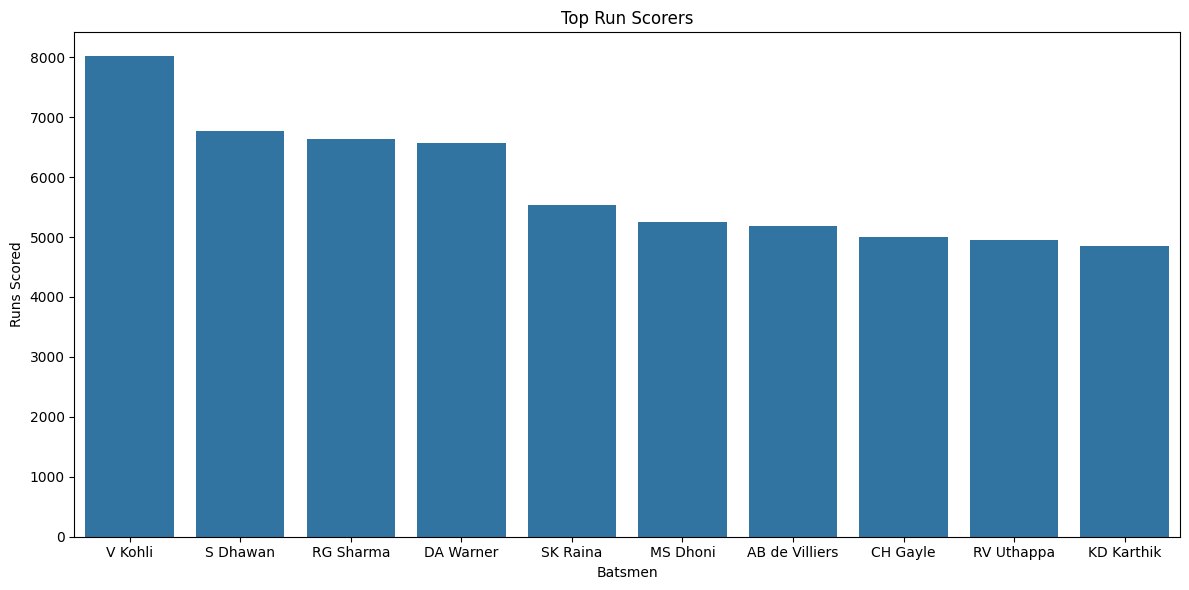

In [16]:
## Finding Runs scored by all Batsmen
total_runs = deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')
# print(total_runs)

## Sorting and thus finding top 10 run scorers
top_10_scorers = total_runs.sort_values(by= 'Runs', ascending= False)[:10]
print(top_10_scorers)



## Plotting the Graph

plt.figure(figsize = [12,6])
sns.barplot(x = 'batter' , y = 'Runs', data = top_10_scorers )

plt.title('Top Run Scorers')
plt.xlabel('Batsmen')
plt.ylabel('Runs Scored')

plt.xticks(rotation = 0) ## Rotating the label of teams by 60 degree
plt.tight_layout()
plt.show()

## Top 10 Best Batting Performances in a Match

In [52]:
## Finding runs scored by each batsmen in each match

run_per_batsmen = deliveries.groupby(['match_id', 'batter', 'batting_team', 'bowling_team'])['batsman_runs'].sum().reset_index(name= 'Inning Best')   ### reset_index() is used to conver the o/p of the code into a new dataframe
# print(run_per_batsmen)


# Step2: Find top scorer in each match
top_scorer_each_match = run_per_batsmen.groupby(['match_id','batter', 'batting_team', 'bowling_team'])['Inning Best'].max().reset_index(name= 'Runs')
# # print(top_scorer_each_match)

# # Step 3: Top Perfromer

top_10_performances = top_scorer_each_match.sort_values(by= 'Runs', ascending= False)[:10]
# print(top_10_performances)

print("--- Top 10 Individual Batting Performances (Overall) ---")
for index, row in top_10_performances.iterrows():
    print(f"Match ID: {row['match_id']}")
    print(f"  Batter: {row['batter']} ({row['batting_team']})")
    print(f"  Score: {row['Runs']} runs against {row['bowling_team']}")
    print("-" * 30) # Separator for each entry

--- Top 10 Individual Batting Performances (Overall) ---
Match ID: 598027
  Batter: CH Gayle (Royal Challengers Bangalore)
  Score: 175 runs against Pune Warriors
------------------------------
Match ID: 335982
  Batter: BB McCullum (Kolkata Knight Riders)
  Score: 158 runs against Royal Challengers Bangalore
------------------------------
Match ID: 1304112
  Batter: Q de Kock (Lucknow Super Giants)
  Score: 140 runs against Kolkata Knight Riders
------------------------------
Match ID: 829795
  Batter: AB de Villiers (Royal Challengers Bangalore)
  Score: 133 runs against Mumbai Indians
------------------------------
Match ID: 1216510
  Batter: KL Rahul (Kings XI Punjab)
  Score: 132 runs against Royal Challengers Bangalore
------------------------------
Match ID: 1370352
  Batter: Shubman Gill (Gujarat Titans)
  Score: 129 runs against Mumbai Indians
------------------------------
Match ID: 980987
  Batter: AB de Villiers (Royal Challengers Bangalore)
  Score: 129 runs against Gujara

#### Evaluating Strike Rate of the batsman as well

   match_id          batter  Inning Runs  Balls Faced  Strike Rate
0    598027        CH Gayle          175           69       253.62
1    335982     BB McCullum          158           77       205.19
2   1304112       Q de Kock          140           71       197.18
3    829795  AB de Villiers          133           61       218.03
4   1216510        KL Rahul          132           70       188.57
5   1370352    Shubman Gill          129           63       204.76
6    980987  AB de Villiers          129           53       243.40
7    548372        CH Gayle          128           62       206.45
8   1136602         RR Pant          128           64       200.00
9    419137         M Vijay          127           57       222.81


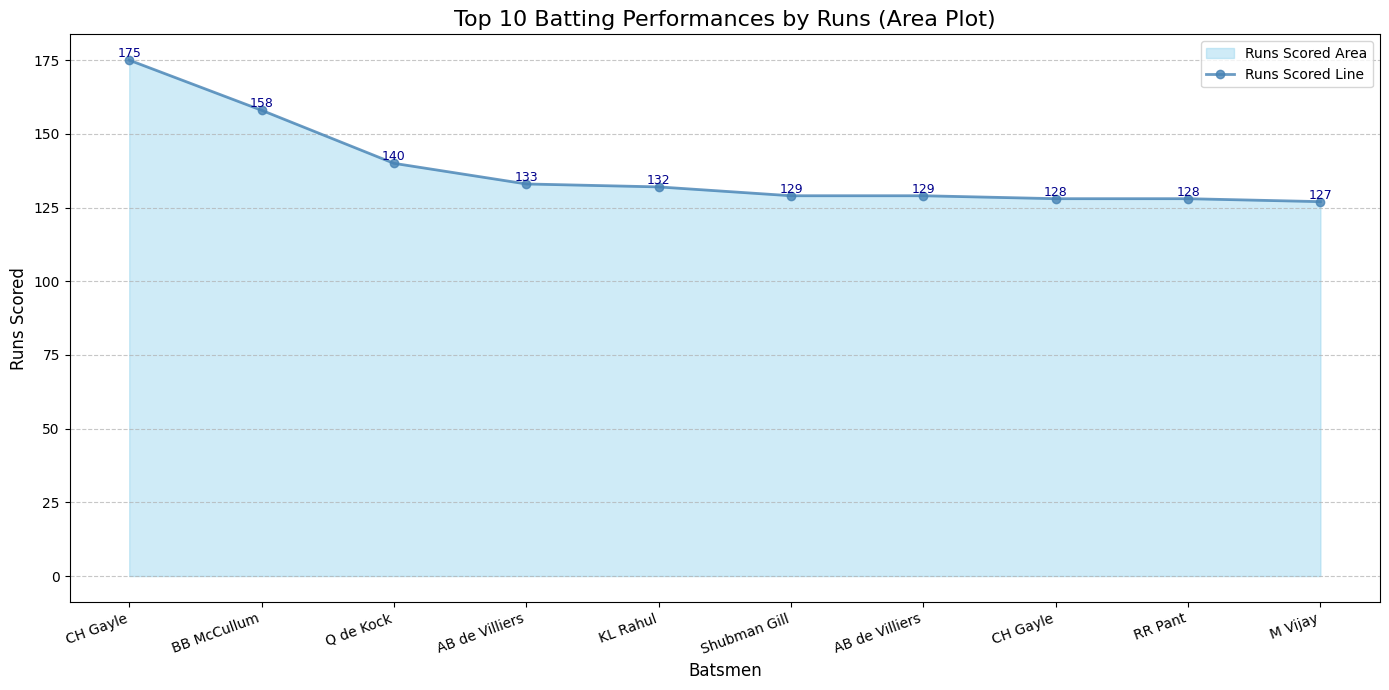

In [13]:
## S1: Finding top run scorer: 

scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name= 'Inning Runs')
top_scorers = scores.sort_values(by= 'Inning Runs', ascending = False)[:10]

# print(top_scorers)

## S2: Find balls faced by batsmen in that innings
balls_faced = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].count().reset_index(name= 'Balls Faced')
# print(balls_faced)

## Joining S1 And S2 using JOIN
player_data = pd.merge(top_scorers, balls_faced, how='inner', on= ['match_id','batter'])
# print(player_data)

## Evaluating Strike Rate
player_data['Strike Rate'] = np.round(player_data['Inning Runs']*100/player_data['Balls Faced'],2)
print(player_data)



## Plotting the Graph

plt.figure(figsize=(14, 7)) # Increased figure size for better readability

# Sort the data for plotting to ensure the area plot is ordered from highest to lowest runs
player_data_sorted_for_plot = player_data.sort_values(by='Inning Runs', ascending=False)

# Create numerical positions for x-axis ticks
x_positions = np.arange(len(player_data_sorted_for_plot))

# Plot the filled area
plt.fill_between(x_positions, player_data_sorted_for_plot['Inning Runs'], color='skyblue', alpha=0.4, label='Runs Scored Area')

# Add a line on top of the area for better visual clarity and markers
plt.plot(x_positions, player_data_sorted_for_plot['Inning Runs'], color='steelblue', alpha=0.8, marker='o', linestyle='-', linewidth=2, label='Runs Scored Line')

# Add labels to the data points for better readability
for i, row in player_data_sorted_for_plot.iterrows():
    plt.text(x_positions[player_data_sorted_for_plot.index.get_loc(i)], row['Inning Runs'],
             f"{row['Inning Runs']}",
             ha='center', va='bottom', fontsize=9, color='darkblue')

plt.title('Top 10 Batting Performances by Runs (Area Plot)', fontsize=16)
plt.xlabel('Batsmen', fontsize=12)
plt.ylabel('Runs Scored', fontsize=12)

# Set custom x-axis tick labels to show batter names
plt.xticks(x_positions, player_data_sorted_for_plot['batter'], rotation=20, ha='right', fontsize=10)
plt.yticks(fontsize=10) # Set font size for y-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.legend() # Show legend for the plot elements
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Top 10 Highest Wicket Takers

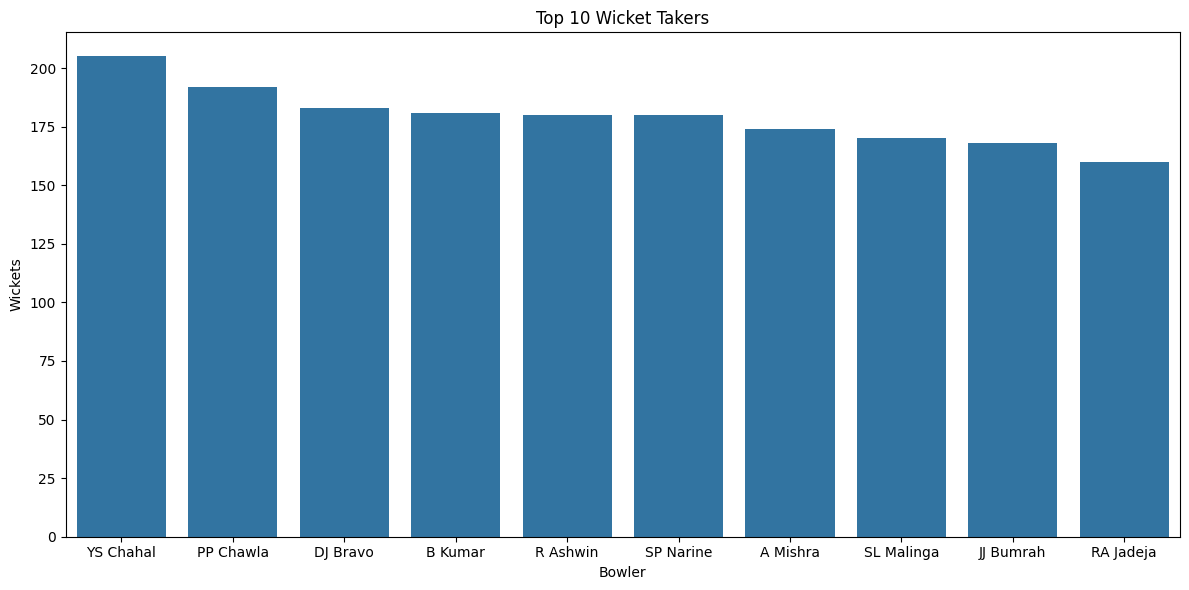

In [6]:
## In the the deliveries database, there are multiple type of wickets such as run out, wicket, caught => We have to exclude run outs, retired hurt

valid_wickets = deliveries[~deliveries['dismissal_kind'].isin(['run out', 'retired out', 'retired hurt'])]
# print(valid_wickets['dismissal_kind'].value_counts())

## Grouping 
total_wkt = valid_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name= 'Total Wickets')

## Sorting and finding top 10
top_10_bowlers = total_wkt.sort_values(by= 'Total Wickets', ascending= False)[:10]


# Plotting the Graph

plt.figure(figsize = [12,6])
diagram = sns.barplot(x = 'bowler' , y = 'Total Wickets', data = top_10_bowlers )

plt.title('Top 10 Wicket Takers')
plt.xlabel('Bowler')
plt.ylabel('Wickets')


plt.xticks(rotation = 0) ## Rotating the label of teams by 60 degree
plt.tight_layout()
plt.show()



## Top 10 Bowling Performances

       match_id         bowler  Wickets  Runs Given
8498    1178394      AS Joseph        6          12
290      336005  Sohail Tanvir        6          14
6608     980979        A Zampa        6          19
695      392182       A Kumble        5           5
12085   1370351  Akash Madhwal        5           5
12104   1370352      MM Sharma        5          10
11008   1304102      JJ Bumrah        5          10
2491     501229       I Sharma        5          12
2167     501201     SL Malinga        5          13
7856    1136585     AS Rajpoot        5          14


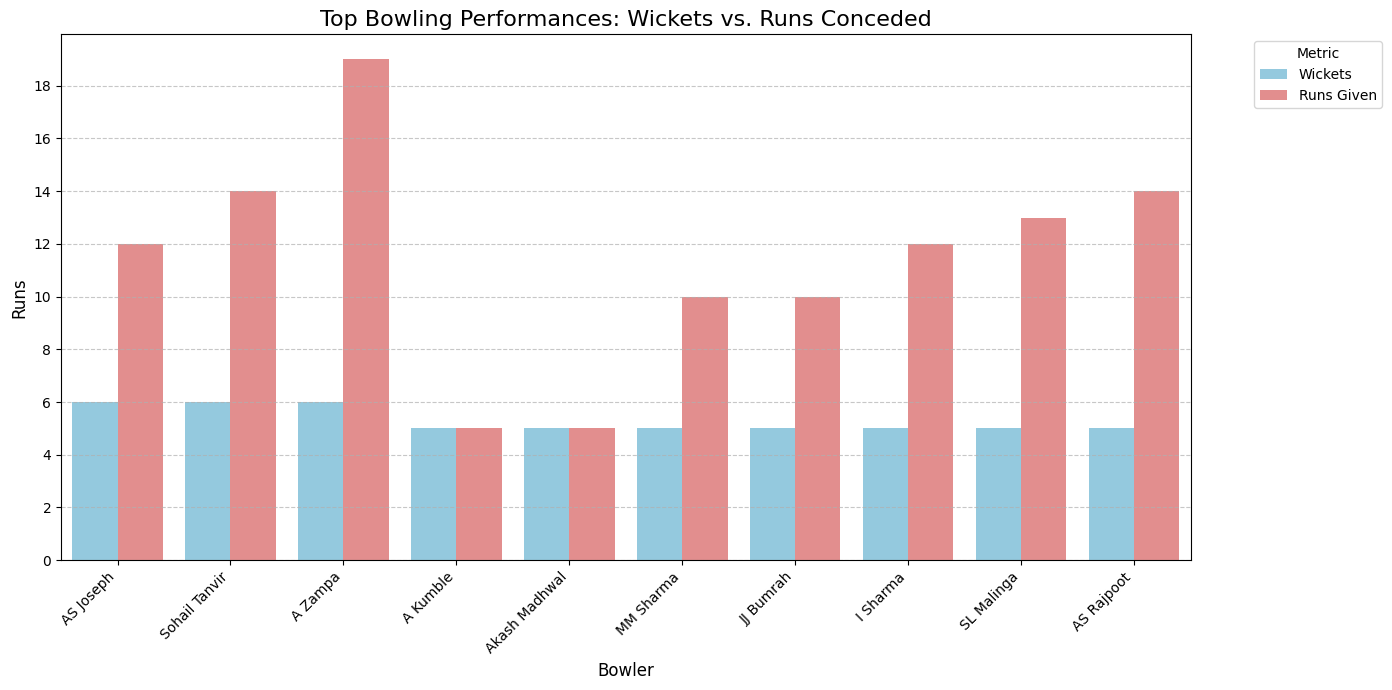

In [44]:
## We have to find best bowling ,i.e. it should have number of wickets, runs conceded

#s1: Find who took highest wickets in a single match => Consider only those wickets which are not run out, retired hurt

# Calculate wickets per bowler per match
wickets_per_match_bowler = valid_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name= 'Wickets')

#s2: Since we have to consider bowling performance => Consider runs concedded as well => Runs Concede by bowler do not considers leg byes and byes

#s2.1: Seperate Valid runs

valid_bowling_runs = deliveries[~deliveries['extras_type'].isin(['legbyes', 'byes'])]

#s2.2 : Calculate total runs gicen by each bowler in a match
runs_concedded = valid_bowling_runs.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name= 'Runs Given')


#s3 : Combine s1 and s2.2 using Join
bowling_performance = pd.merge(wickets_per_match_bowler, runs_concedded, how='inner', on= ['match_id','bowler']).sort_values(by='Wickets', ascending= False)


#s4 : To find the best bowling performance with preference for wickets (highest) and then runs conceded (lowest), sort by both columns simultaneously.

final = bowling_performance.sort_values(by=['Wickets', 'Runs Given'], ascending=[False, True])[:10]

print(final)



# --- Plotting the Grouped Bar Chart ---

# Reshape the 'final' DataFrame for seaborn.barplot with 'hue'
melted_final = final.melt(
    id_vars=['match_id', 'bowler'],
    value_vars=['Wickets', 'Runs Given'],
    var_name='Metric',
    value_name='Value'
)

# Get the desired order of bowlers from the 'final' DataFrame (which is already sorted)
bowler_order = final['bowler'].tolist()


plt.figure(figsize=(14, 7))

sns.barplot(
    x='bowler',
    y='Value',
    hue='Metric',
    data=melted_final,
    order=bowler_order,
    palette={'Wickets': 'skyblue', 'Runs Given': 'lightcoral'}
)

plt.title('Top Bowling Performances: Wickets vs. Runs Conceded', fontsize=16)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Runs', fontsize=12)

# --- KEY CHANGE: Force Y-axis ticks to be integers using MaxNLocator ---
ax = plt.gca() # Get the current axes
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Set major ticks to be integers

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Top 10 Hosts

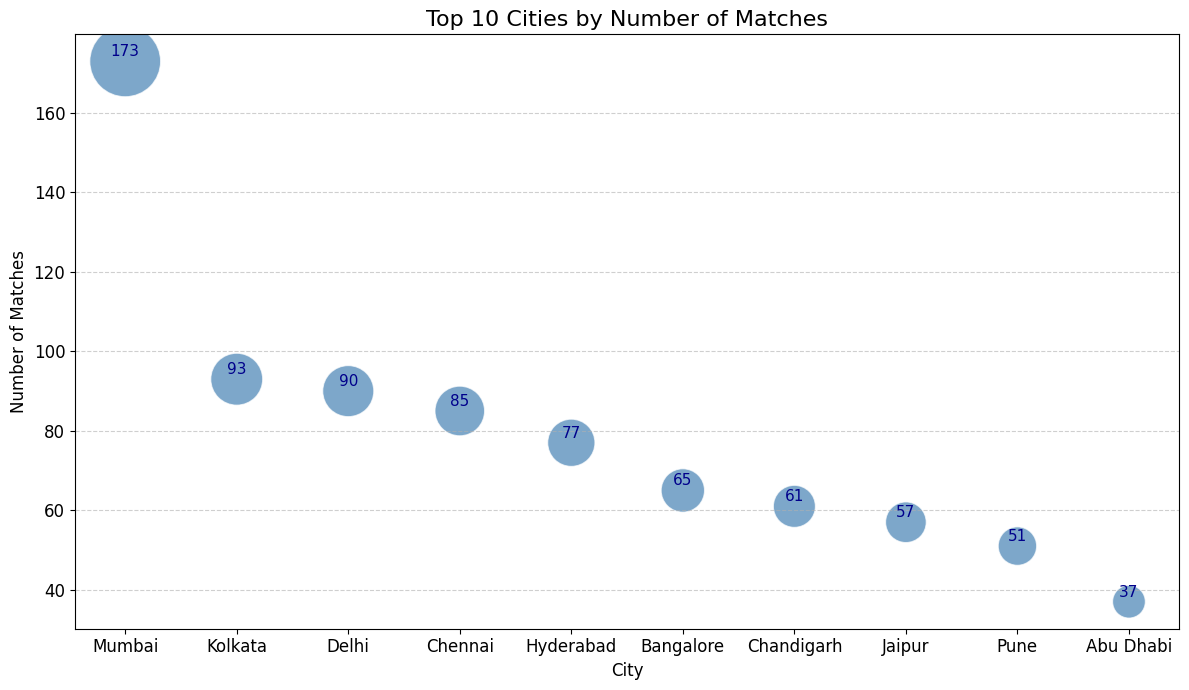

In [79]:
cities= matches.groupby(['city'])['city'].count().reset_index(name= 'Number of Matches')
top_10_cities = cities.sort_values(by= 'Number of Matches', ascending= False)[:10]



# --- Scatter Plot Code ---
plt.figure(figsize=(12, 7))

# Create numerical positions for the x-axis for each city
x_positions = range(len(top_10_cities))

# Create the scatter plot
plt.scatter(
    x=x_positions,
    y=top_10_cities['Number of Matches'],
    s=top_10_cities['Number of Matches'] * 15, # Size markers by number of matches for emphasis
    alpha=0.7,
    color='steelblue',
    edgecolors='w',
    linewidth=0.8
)

# Add labels to each point
for i, row in top_10_cities.iterrows():
    plt.text(
        x_positions[top_10_cities.index.get_loc(i)], # Get the numerical position for the label
        row['Number of Matches'] + 0.5, # Slightly offset text above the point
        f"{row['Number of Matches']}",
        ha='center',
        va='bottom',
        fontsize=11,
        color='darkblue'
    )

plt.title('Top 10 Cities by Number of Matches', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Set x-axis ticks and labels to show city names
plt.xticks(x_positions, top_10_cities['city'], rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add a subtle horizontal grid

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Top 10 Highest Catchers

            fielder  Number of Catches
332        MS Dhoni                220
247      KD Karthik                199
22   AB de Villiers                141
451      RV Uthappa                133
590         WP Saha                131
572         V Kohli                131
490        SK Raina                119
423       RA Jadeja                116
517       SV Samson                115
430       RG Sharma                111


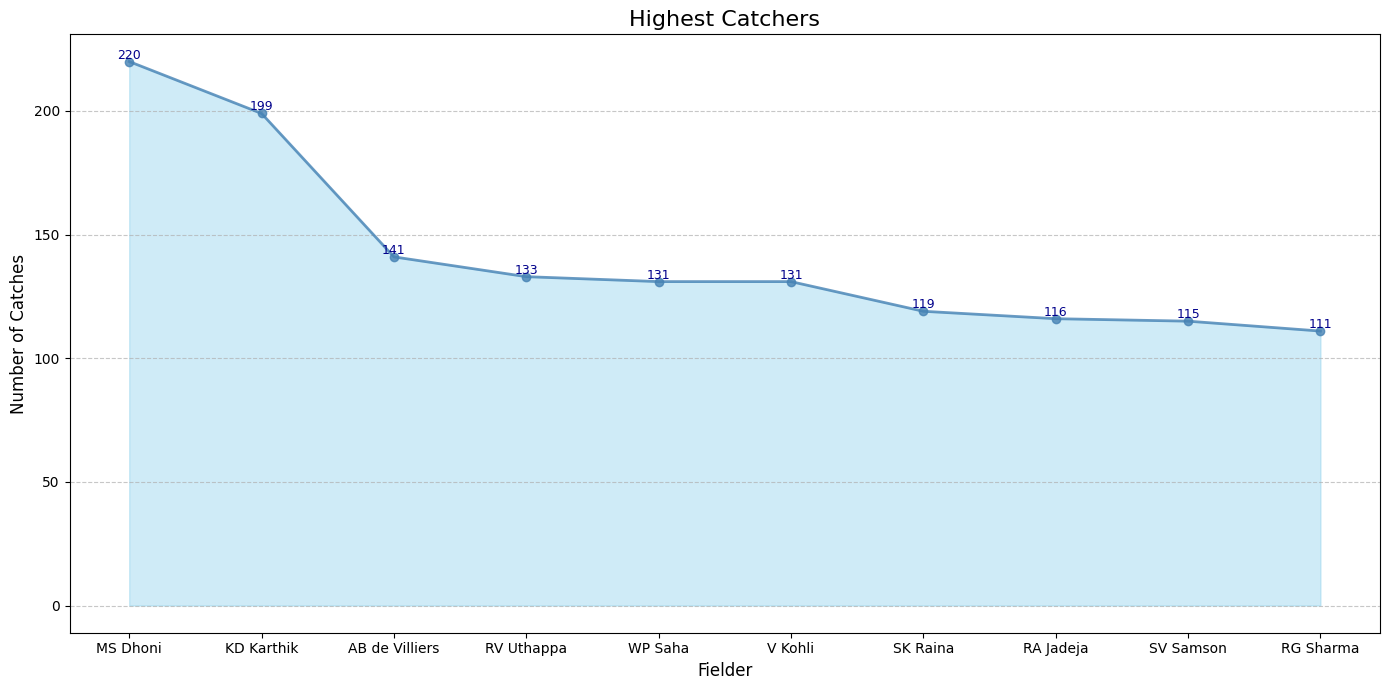

In [99]:
fielders = deliveries.groupby('fielder')['fielder'].count().reset_index(name= 'Number of Catches')

most_catchers = fielders.sort_values(by= 'Number of Catches', ascending= False)[:10]
print(most_catchers)


## Plotting the Graph

plt.figure(figsize=(14, 7)) # Increased figure size for better readability

# Sort the data for plotting to ensure the area plot is ordered from highest to lowest catches
player_data_sorted_for_plot = most_catchers.sort_values(by='Number of Catches', ascending=False)

# Create numerical positions for x-axis ticks
x_positions = np.arange(len(player_data_sorted_for_plot))

# Plot the filled area
plt.fill_between(x_positions, player_data_sorted_for_plot['Number of Catches'], color='skyblue', alpha=0.4)

# Add a line on top of the area for better visual clarity and markers
plt.plot(x_positions, player_data_sorted_for_plot['Number of Catches'], color='steelblue', alpha=0.8, marker='o', linestyle='-', linewidth=2)

# Add labels to the data points for better readability
for i, row in player_data_sorted_for_plot.iterrows():
    plt.text(x_positions[player_data_sorted_for_plot.index.get_loc(i)], row['Number of Catches'],
             f"{row['Number of Catches']}",
             ha='center', va='bottom', fontsize=9, color='darkblue')

plt.title('Highest Catchers', fontsize=16)
plt.xlabel('Fielder', fontsize=12)
plt.ylabel('Number of Catches', fontsize=12)

# Set custom x-axis tick labels to show batter names
plt.xticks(x_positions, player_data_sorted_for_plot['fielder'], rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10) # Set font size for y-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Analysis of IPL Over by Over

      total_runs  is_wicket  extra_runs  batsman_runs
over                                                 
0          13651        463        1257         12394
1          16163        503        1266         14897
2          17895        533         961         16934
3          18415        548         905         17510
4          18565        576         812         17753
5          18528        540         887         17641
6          14839        444         804         14035
7          15981        472         721         15260
8          16639        537         724         15915
9          16353        498         715         15638
10         16779        568         663         16116
11         17076        567         683         16393
12         17205        585         806         16399
13         17634        633         735         16899
14         18149        695         776         17373
15         18472        736         868         17604
16         19012        779 

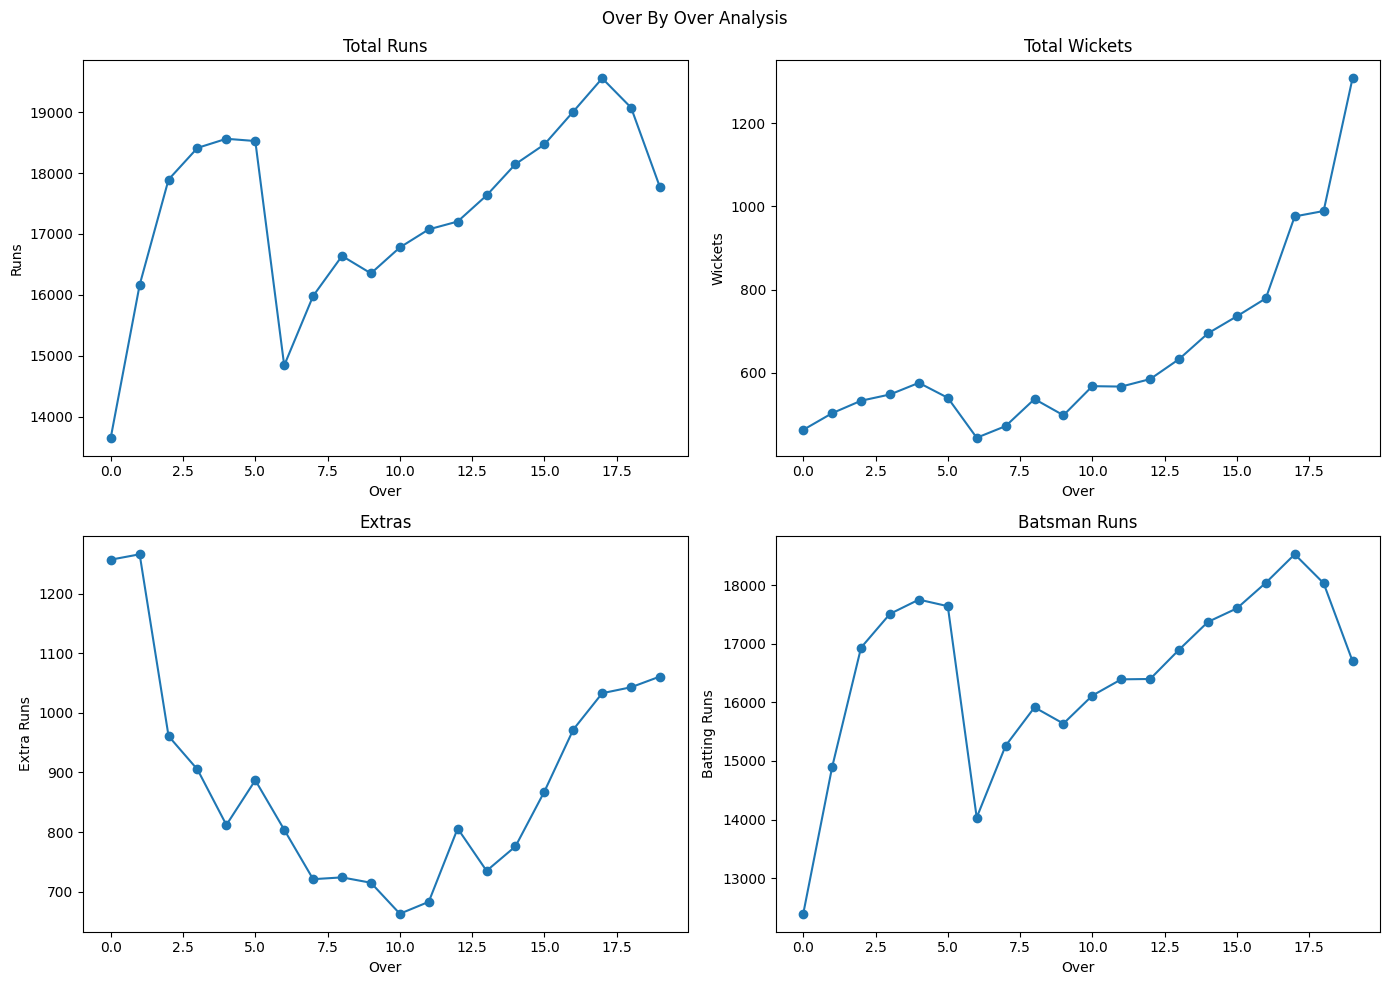

In [111]:
over_by_over = deliveries.groupby('over')[['total_runs','is_wicket', 'extra_runs', 'batsman_runs']].sum()

print(over_by_over)


## Plotting all the parameters

fig, axes = plt.subplots(2,2, figsize= (14,10))

fig.suptitle('Over By Over Analysis')

axes[0,0].plot(over_by_over.index, over_by_over['total_runs'], marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_by_over.index, over_by_over['is_wicket'], marker='o')
axes[0,1].set_title('Total Wickets')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_by_over.index, over_by_over['extra_runs'], marker='o')
axes[1,0].set_title('Extras')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Extra Runs')

axes[1,1].plot(over_by_over.index, over_by_over['batsman_runs'], marker='o')
axes[1,1].set_title('Batsman Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Batting Runs')

plt.tight_layout()
plt.show()

## Toss Pattern

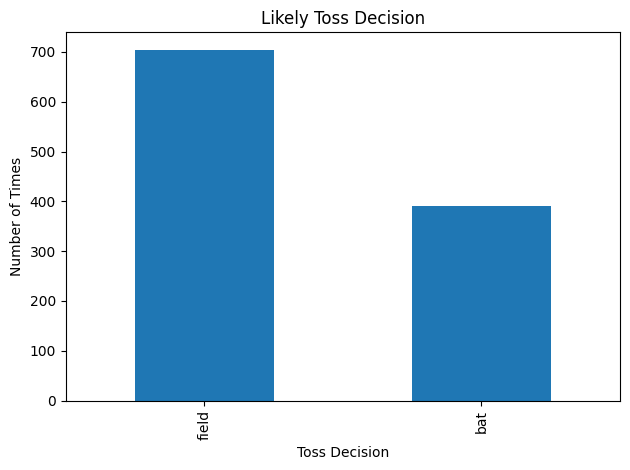

In [114]:
matches['toss_decision'].value_counts().plot(kind= 'bar')
plt.title("Likely Toss Decision")
plt.xlabel("Toss Decision")
plt.ylabel("Number of Times")


plt.tight_layout()
plt.show()